In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [4]:

# Generador basado en ejemplo del curso CS231 de Stanford: 
# CS231n Convolutional Neural Networks for Visual Recognition
# (https://cs231n.github.io/neural-networks-case-study/)
def generar_datos_clasificacion(cantidad_ejemplos, cantidad_clases,tipo,AMPLITUD_ALEATORIEDAD):    

    # Calculamos la cantidad de puntos por cada clase, asumiendo la misma cantidad para cada 
    # una (clases balanceadas)
    n = int(cantidad_ejemplos / cantidad_clases)

    # Entradas: 2 columnas (x1 y x2)
    x = np.zeros((cantidad_ejemplos, 2))
    # Salida deseada ("target"): 1 columna que contendra la clase correspondiente (codificada como un entero)
    t = np.zeros(cantidad_ejemplos, dtype="uint8")  # 1 columna: la clase correspondiente (t -> "target")

    randomgen = np.random.default_rng()
    if tipo=='espiral':
        FACTOR_ANGULO = 0.79        
        # Por cada clase (que va de 0 a cantidad_clases)...
        for clase in range(cantidad_clases):
            # Tomando la ecuacion parametrica del circulo (x = r * cos(t), y = r * sin(t)), generamos 
            # radios distribuidos uniformemente entre 0 y 1 para la clase actual, y agregamos un poco de
            # aleatoriedad
            radios = np.linspace(0, 1, n) + AMPLITUD_ALEATORIEDAD * randomgen.standard_normal(size=n)

            # ... y angulos distribuidos tambien uniformemente, con un desfasaje por cada clase
            angulos = np.linspace(clase * np.pi * FACTOR_ANGULO, (clase + 1) * np.pi * FACTOR_ANGULO, n)

            # Generamos un rango con los subindices de cada punto de esta clase. Este rango se va
            # desplazando para cada clase: para la primera clase los indices estan en [0, n-1], para
            # la segunda clase estan en [n, (2 * n) - 1], etc.
            indices = range(clase * n, (clase + 1) * n)

            # Generamos las "entradas", los valores de las variables independientes. Las variables:
            # radios, angulos e indices tienen n elementos cada una, por lo que le estamos agregando
            # tambien n elementos a la variable x (que incorpora ambas entradas, x1 y x2)
            x1 = radios * np.sin(angulos)
            x2 = radios * np.cos(angulos)
            x[indices] = np.c_[x1, x2]

            # Guardamos el valor de la clase que le vamos a asociar a las entradas x1 y x2 que acabamos
            # de generar
            t[indices] = clase

        return x, t
    elif tipo=='parabola':        
        # Por cada clase (que va de 0 a cantidad_clases)...
        for clase in range(cantidad_clases):
            # Tomando la ecuacion parametrica del circulo (x = r * cos(t), y = r * sin(t)), generamos 
            
            dom = np.linspace(-1.5, 1.5, n) + AMPLITUD_ALEATORIEDAD * randomgen.standard_normal(size=n)

            

            # Generamos un rango con los subindices de cada punto de esta clase. Este rango se va
            # desplazando para cada clase: para la primera clase los indices estan en [0, n-1], para
            # la segunda clase estan en [n, (2 * n) - 1], etc.
            indices = range(clase * n, (clase + 1) * n)

            # Generamos las "entradas", los valores de las variables independientes. Las variables:
            # radios, angulos e indices tienen n elementos cada una, por lo que le estamos agregando
            # tambien n elementos a la variable x (que incorpora ambas entradas, x1 y x2)
            d=np.random.rand(1,1)
            if clase==0:                
                x1 = dom
                x2 = dom*dom+(d[0])
            elif clase==1:                
                x1 = dom
                x2 = -dom*dom-(d[0])
            elif clase==2:                
                x1 = dom*dom+(d[0])
                x2 = dom
            elif clase==3:               
                x1 = -dom*dom-(d[0])
                x2 = dom
            x[indices] = np.c_[x1, x2]
            # Guardamos el valor de la clase que le vamos a asociar a las entradas x1 y x2 que acabamos
            # de generar
            t[indices] = clase

        return x, t
    elif tipo=='linea':   
        t = np.zeros(cantidad_ejemplos)  # 1 columna: la clase correspondiente (t -> "target")  
        x[:,0]=np.linspace(3,7,cantidad_ejemplos)
        aux=0
        for k in range(len(x)):    
            aux+=1        
            x[k,1]=x[k,0]+AMPLITUD_ALEATORIEDAD*(np.power(-1,aux))*np.random.rand()   
            t[k]=x[k,1]   
        t=t[:,np.newaxis]          
        return x,t

<h4>Ejemplos de Utilizacion del Generador de Datos</h4>

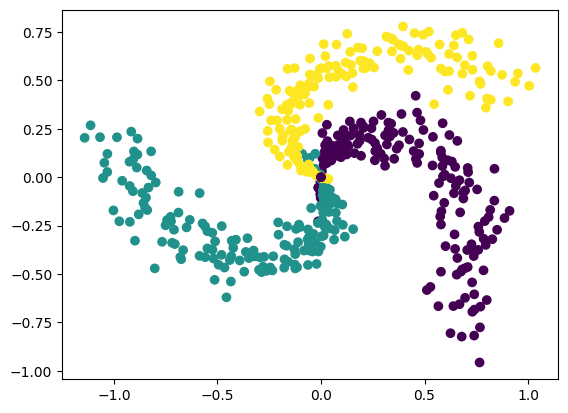

In [5]:
x,t=generar_datos_clasificacion(500,3,'espiral',0.1)
plt.scatter(x[:,0],x[:,1],c=t)
plt.show()

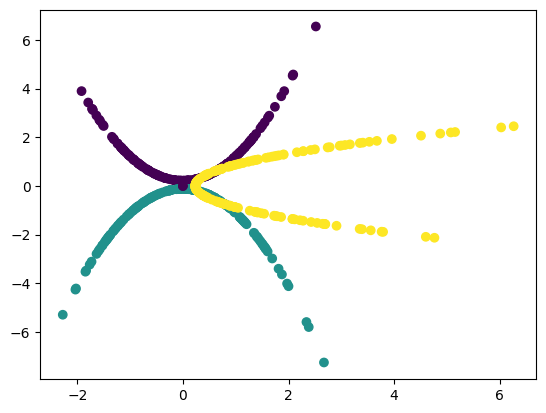

In [6]:
x,t=generar_datos_clasificacion(500,3,'parabola',0.6)
plt.scatter(x[:,0],x[:,1],c=t)
plt.show()

tamano de t (100, 1)


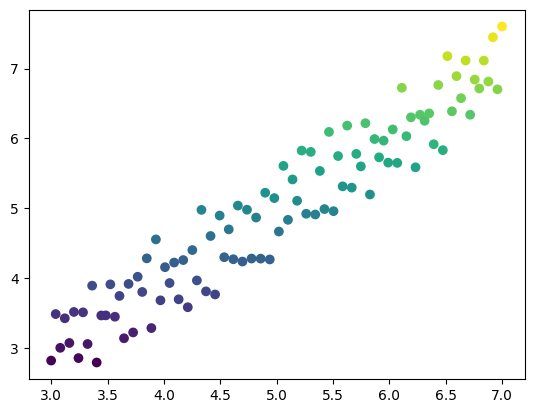

In [7]:
x,t=generar_datos_clasificacion(100,1,'linea',0.7)

print('tamano de t '+str(np.shape(t)))
plt.scatter(x[:,0],x[:,1],c=t)
plt.show()

In [8]:
def inicializar_pesos(n_entrada, n_capa_2, n_capa_3):
    randomgen = np.random.default_rng()

    w1 = 0.1 * randomgen.standard_normal((n_entrada, n_capa_2))
    b1 = 0.1 * randomgen.standard_normal((1, n_capa_2))

    w2 = 0.1 * randomgen.standard_normal((n_capa_2, n_capa_3))
    b2 = 0.1 * randomgen.standard_normal((1,n_capa_3))

    return {"w1": w1, "b1": b1, "w2": w2, "b2": b2}

In [9]:
def sigmoide(x):
    y=np.zeros(len(x))
    y=1/(1+np.exp(-x))
    return y
def dSig(x):
    dy=np.zeros(len(x))
    dy=sigmoide(x)*(1-sigmoide(x))
    return dy

In [10]:
def ejecutar_adelante(x, pesos,fAct):
    # Funcion de entrada (a.k.a. "regla de propagacion") para la primera capa oculta
    z = x.dot(pesos["w1"]) + pesos["b1"]
    if fAct=='Relu':
        # Funcion de activacion ReLU para la capa oculta (h -> "hidden")
        h = np.maximum(0, z)
    elif fAct=='Sigm':
        h=sigmoide(z)
    # Salida de la red (funcion de activacion lineal). Esto incluye la salida de todas
    # las neuronas y para todos los ejemplos proporcionados
    y = h.dot(pesos["w2"]) + pesos["b2"]

    return {"z": z, "h": h, "y": y}

In [16]:
    
def graficarPerdida(e,l,accur):
    plt.subplot(2,1,1)
    plt.plot(e,l)
    #plt.title('Grafica de perdida vs epochs')
    plt.xlabel('epochs')
    plt.ylabel('perdida')
    plt.subplot(2,1,2)    
    plt.plot(e,accur)
    plt.xlabel('epochs')
    plt.ylabel('exactitud')
    plt.show()

In [12]:
def accuracy(y,t):
    max_scores = np.argmax(y, axis=1)
    #print(max_scores)
    aciertos=0
    for j in range(len(max_scores)):
        if(t[j]==max_scores[j]):
            aciertos+=1;
    exactitud=aciertos/len(t)
    return exactitud

In [13]:
# x: n entradas para cada uno de los m ejemplos(nxm)
# t: salida correcta (target) para cada uno de los m ejemplos (m x 1)
# pesos: pesos (W y b)
def train(x, t,xVal,tVal, pesos, learning_rate, epochs,n_epochs_parada,error_parada,fLoss,fAct):
    # Cantidad de filas (i.e. cantidad de ejemplos)
    m = np.size(x, 0) 
    e=np.zeros(epochs)
    l=np.zeros(epochs)
    accur=np.zeros(epochs)
    lant=0
    aant=0
    yval=0
      
    for i in range(epochs):
        # Ejecucion de la red hacia adelante
        resultados_feed_forward = ejecutar_adelante(x, pesos,fAct)
        

        y = resultados_feed_forward["y"]
        h = resultados_feed_forward["h"]
        z = resultados_feed_forward["z"]
        # Accuracy
        
        accur[i]=accuracy(y,t)        

        # LOSS
        if fLoss=='Softmax':
        # a. Exponencial de todos los scores
            exp_scores = np.exp(y)

        # b. Suma de todos los exponenciales de los scores, fila por fila (ejemplo por ejemplo).
        #    Mantenemos las dimensiones (indicamos a NumPy que mantenga la segunda dimension del
        #    arreglo, aunque sea una sola columna, para permitir el broadcast correcto en operaciones
        #    subsiguientes)
            sum_exp_scores = np.sum(exp_scores, axis=1, keepdims=True)

        # c. "Probabilidades": normalizacion de las exponenciales del score de cada clase (dividiendo por 
        #    la suma de exponenciales de todos los scores), fila por fila
            p = exp_scores / sum_exp_scores

        # d. Calculo de la funcion de perdida global. Solo se usa la probabilidad de la clase correcta, 
        #    que tomamos del array t ("target")
            loss = (1 / m) * np.sum( -np.log( p[range(m), t] ))
        elif fLoss=='MSE':
            loss=(1/m)*(np.sum(np.power(y-t,2)))
        l[i]=loss
        # Mostramos solo cada 1000 epochs
        if (i %n_epochs_parada == 0 and fLoss!='MSE'): 
            validacion=ejecutar_adelante(xVal,pesos,fAct)            
            yval = validacion["y"]  
            accurVal=accuracy(yval,tVal)                     
            if(i>2*n_epochs_parada ):                
                #print("accuracy epoch", i, ":", accurVal)
                if(accurVal-aant<error_parada ):
                    print('Parada Temprana Realizada por error= ',accurVal-aant)
                    print("accuracy epoch", i, ":", accurVal)
                    break
                    return pesos     
                if(l[i]-lant>abs(error_parada)):
                    print('Parada Temprana Realizada por error= ',abs(l[i]-lant))
                    print("loss epoch", i, ":", l[i])
                    break
                    return pesos        
            print("accuracy epoch", i, ":", accurVal)
            print("loss epochs ",i,":",l[i])
            aant=accurVal    
            lant=l[i]     
        # Extraemos los pesos a variables locales
        w1 = pesos["w1"]
        b1 = pesos["b1"]
        w2 = pesos["w2"]
        b2 = pesos["b2"]

        # Ajustamos los pesos: Backpropagation
        if fLoss=='Softmax':
            dL_dy = p                # Para todas las salidas, L' = p (la probabilidad)...
            dL_dy[range(m), t] -= 1  # ... excepto para la clase correcta
            dL_dy /= m       
            
        if fLoss=='MSE':
            dL_dy = (2*(y-t))/m                # Para todas las salidas, L' = 2*(y-t)/m        
            

        dL_dw2 = h.T.dot(dL_dy)                         # Ajuste para w2
        dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)   # Ajuste para b2        
        dL_dh = dL_dy.dot(w2.T)
        
        if fAct=='Relu':    
            dL_dz = dL_dh       # El calculo dL/dz = dL/dh * dh/dz. La funcion "h" es la funcion de activacion de la capa oculta,
            dL_dz[z <= 0] = 0   # para la que usamos ReLU. La derivada de la funcion ReLU: 1(z > 0) (0 en otro caso)
            
            
        if fAct=='Sigm':
            ds=dSig(z)
            dL_dz = dL_dh*(ds)      # El calculo dL/dz = dL/dh * dh/dz. La funcion "h" es la funcion de activacion de la capa oculta
            

        dL_dw1 = x.T.dot(dL_dz)                         # Ajuste para w1
        dL_db1 = np.sum(dL_dz, axis=0, keepdims=True)   # Ajuste para b1

        
        # Aplicamos el ajuste a los pesos
        
        w1 += -learning_rate * dL_dw1
        b1 += -learning_rate * dL_db1
        w2 += -learning_rate * dL_dw2
        b2 += -learning_rate * dL_db2

        # Actualizamos la estructura de pesos
        # Extraemos los pesos a variables locales
        pesos["w1"] = w1
        pesos["b1"] = b1
        pesos["w2"] = w2
        pesos["b2"] = b2
        e[i]=i
    graficarPerdida(e,l,accur)    
    return (pesos)

In [14]:
def iniciar(numero_clases, numero_ejemplos_train,numero_ejemplos_test,numero_ejemplos_val, graficar_datos_train,graficar_datos_val,graficar_datos_test,tipo_dataset,f_Loss,f_Act,AMPLITUD_ALEATORIEDAD):
    # Generamos datos
    
    x, t = generar_datos_clasificacion(numero_ejemplos_train, numero_clases,tipo_dataset,AMPLITUD_ALEATORIEDAD)
    xVal, tVal = generar_datos_clasificacion(numero_ejemplos_val, numero_clases,tipo_dataset,AMPLITUD_ALEATORIEDAD)
    xTest, tTest = generar_datos_clasificacion(numero_ejemplos_test, numero_clases,tipo_dataset,AMPLITUD_ALEATORIEDAD)

    # Graficamos los datos si es necesario
    if graficar_datos_train:
        # Parametro: "c": color (un color distinto para cada clase en t)
        plt.scatter(x[:, 0], x[:, 1], c=t)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Grafica de Datos de Entrenamiento')
        plt.show()
    if graficar_datos_test:
            # Parametro: "c": color (un color distinto para cada clase en t)
        plt.scatter(xTest[:, 0], xTest[:, 1], c=tTest)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Grafica de Datos de Test')
        plt.show()
    if graficar_datos_val:
            # Parametro: "c": color (un color distinto para cada clase en t)
        plt.scatter(xVal[:, 0], xVal[:, 1], c=tVal)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Grafica de Datos de Validacion')
        plt.show()

    # Inicializa pesos de la red
    NEURONAS_CAPA_OCULTA = 100
    NEURONAS_ENTRADA = 2
    pesos = inicializar_pesos(n_entrada=NEURONAS_ENTRADA, n_capa_2=NEURONAS_CAPA_OCULTA, n_capa_3=numero_clases)

    # Entrena
    LEARNING_RATE=0.6
    EPOCHS=4000
    PARADATEMPRANA=1000
    error_parada=-0.02
    print('------------------------Entranamiento---------------------------------------------------')
    pesosT=train(x, t,xVal,tVal, pesos, LEARNING_RATE, EPOCHS,PARADATEMPRANA,error_parada,fLoss=f_Loss,fAct=f_Act)
    print('------------------------Prueba---------------------------------------------------')
    Test=ejecutar_adelante(xTest,pesosT,f_Act)
    yT = Test["y"]
    print('exactitud con los datos de prueba',accuracy(yT,tTest))  


<h4>Clasificacion con funcion de activacion Sigmoidal</h4>

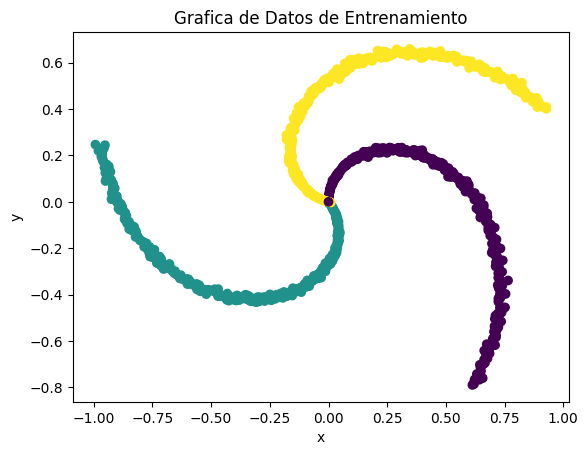

------------------------Entranamiento---------------------------------------------------
accuracy epoch 0 : 0.3333333333333333
loss epochs  0 : 1.123506951414948
accuracy epoch 1000 : 0.87
loss epochs  1000 : 0.25177869733524444
accuracy epoch 2000 : 0.9666666666666667
loss epochs  2000 : 0.12327053270052006
accuracy epoch 3000 : 0.98
loss epochs  3000 : 0.08237834867566773


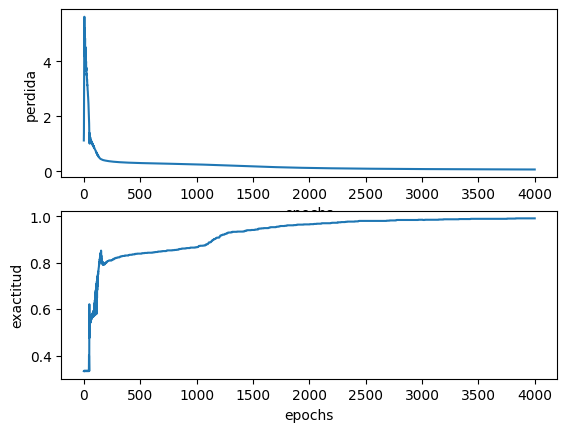

------------------------Prueba---------------------------------------------------
exactitud con los datos de prueba 0.9866666666666667


In [17]:

iniciar(numero_clases=3, numero_ejemplos_train=1000,numero_ejemplos_test=150,numero_ejemplos_val=300,graficar_datos_train=True,graficar_datos_val=False,graficar_datos_test=False,tipo_dataset='espiral',f_Loss='Softmax',f_Act='Sigm',AMPLITUD_ALEATORIEDAD=0.01)

<h4>Clasificacion con funcion de activacion Relu</h4>

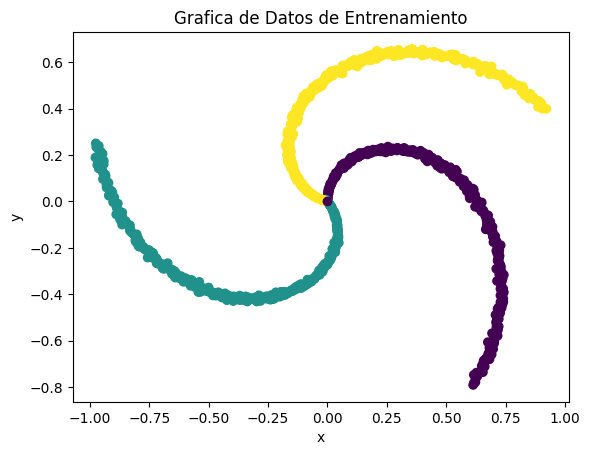

------------------------Entranamiento---------------------------------------------------
accuracy epoch 0 : 0.3333333333333333
loss epochs  0 : 1.1166017281567124
accuracy epoch 1000 : 0.9866666666666667
loss epochs  1000 : 0.05705747905646823
accuracy epoch 2000 : 0.9933333333333333
loss epochs  2000 : 0.039225475962661134
accuracy epoch 3000 : 0.9933333333333333
loss epochs  3000 : 0.03182115618768771


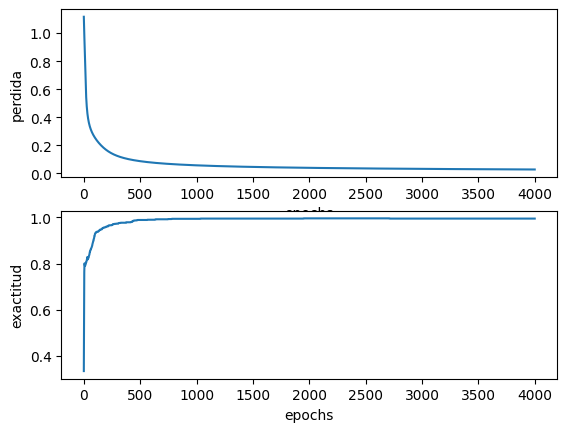

------------------------Prueba---------------------------------------------------
exactitud con los datos de prueba 0.9866666666666667


In [11]:

iniciar(numero_clases=3, numero_ejemplos_train=1000,numero_ejemplos_test=150,numero_ejemplos_val=300,graficar_datos_train=True,graficar_datos_val=False,graficar_datos_test=False,tipo_dataset='espiral',f_Loss='Softmax',f_Act='Relu',AMPLITUD_ALEATORIEDAD=0.01)

In [18]:
def train_Reg(x, t,pesos, learning_rate, epochs,fAct):
    # Cantidad de filas (i.e. cantidad de ejemplos)
    m = np.size(x, 0) 
    e=np.zeros(epochs)
    l=np.zeros(epochs)    
    for i in range(epochs):
        # Ejecucion de la red hacia adelante
        resultados_feed_forward = ejecutar_adelante(x, pesos,fAct)
        y = resultados_feed_forward["y"]        
        h = resultados_feed_forward["h"]
        z = resultados_feed_forward["z"]
        # Funcion de perdida MSE  
        loss=(1/m)*(np.sum(np.power(y-t,2)))
        l[i]=loss
        #print(l[i])
        # Extraemos los pesos a variables locales
        w1 = pesos["w1"]
        b1 = pesos["b1"]
        w2 = pesos["w2"]         
        b2 = pesos["b2"]

        # Ajustamos los pesos: Backpropagation
        dL_dy = (2*(y-t))/m                # Para todas las salidas, L' = 2*(y-t)/m 
        dL_dw2 = h.T.dot(dL_dy)                         # Ajuste para w2
        dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)   # Ajuste para b2        
        dL_dh = dL_dy.dot(w2.T)
        
        if fAct=='Relu':    
            dL_dz = dL_dh       # El calculo dL/dz = dL/dh * dh/dz. La funcion "h" es la funcion de activacion de la capa oculta,
            dL_dz[z <= 0] = 0   # para la que usamos ReLU. La derivada de la funcion ReLU: 1(z > 0) (0 en otro caso)
            
            
        if fAct=='Sigm':
            ds=dSig(z)
            dL_dz = dL_dh*(ds)      # El calculo dL/dz = dL/dh * dh/dz. La funcion "h" es la funcion de activacion de la capa oculta
            

        dL_dw1 = x.T.dot(dL_dz)                         # Ajuste para w1
        dL_db1 = np.sum(dL_dz, axis=0, keepdims=True)   # Ajuste para b1

        
        # Aplicamos el ajuste a los pesos
        
        w1 += -learning_rate * dL_dw1
        b1 += -learning_rate * dL_db1
        w2 += -learning_rate * dL_dw2
        b2 += -learning_rate * dL_db2

        # Actualizamos la estructura de pesos
        # Extraemos los pesos a variables locales
        pesos["w1"] = w1
        pesos["b1"] = b1
        pesos["w2"] = w2
        pesos["b2"] = b2
        e[i]=i
        
    plt.plot(e,l)
    #plt.title('Grafica de perdida vs epochs')
    plt.xlabel('epochs')
    plt.ylabel('perdida')
    plt.show()    
    print('El valor final de perdida es : '+str(l[epochs-1]))
    
    return pesos,y

In [21]:
def iniciarReg(numero_clases, numero_ejemplos_train,graficar_datos_train,tipo_dataset,f_Act,AMPLITUD_ALEATORIEDAD):
    # Generamos datos    
    #x, t = generar_datos_clasificacion(numero_ejemplos_train, numero_clases,tipo_dataset,AMPLITUD_ALEATORIEDAD)
    
    import pandas as pd    
    df=pd.read_csv('/home/matias/Documentos/IA2/u3/DatosBateria - CSV.csv')    
    x=df['minutos']
    x=np.array(x)
    x=x[:,np.newaxis]
    t=df['bateria']
    t=np.array(t)
    t=t[:,np.newaxis]
    yy=np.zeros(len(t))    
    # Graficamos los datos si es necesario
    if graficar_datos_train:
        # Parametro: "c": color (un color distinto para cada clase en t)
        plt.scatter(x,t)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Grafica de Datos de Entrenamiento')
        plt.show()
    
    # Inicializa pesos de la red
    NEURONAS_CAPA_OCULTA = 100
    NEURONAS_ENTRADA = 1
    pesos = inicializar_pesos(n_entrada=NEURONAS_ENTRADA, n_capa_2=NEURONAS_CAPA_OCULTA, n_capa_3=numero_clases)

    # Entrena
    LEARNING_RATE=0.001
    EPOCHS=100000    
    print('------------------------Entranamiento---------------------------------------------------')
    pesosT,yy=train_Reg(x, t, pesos, LEARNING_RATE, EPOCHS,fAct=f_Act)
    return pesosT
    
    
    

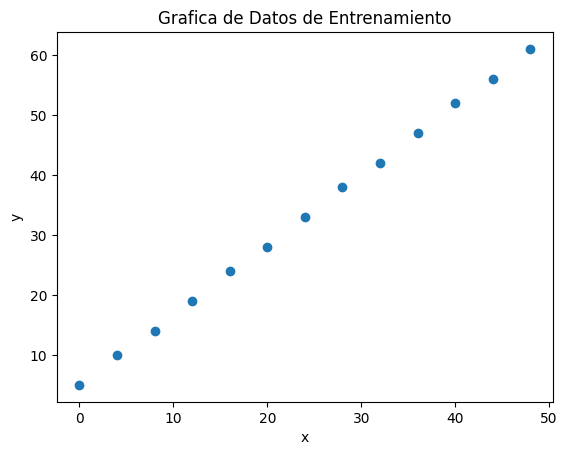

------------------------Entranamiento---------------------------------------------------


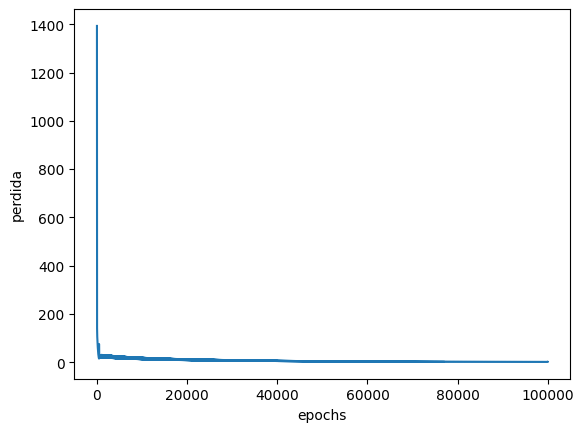

El valor final de perdida es : 1.2956781498295864


In [22]:
pesosT=iniciarReg(1,1000,True,'linea','Sigm',0.2)

In [26]:
def graficaReg(x,t,predic):
    plt.plot(x,predic,'b*',x,t,'g.')
    plt.xlabel('t[min]')
    plt.ylabel('% carga')
    plt.grid()
    plt.show()

In [52]:
def prediccion(x,pesosT):
    predict=np.zeros(len(x))
    predict=ejecutar_adelante(x,pesosT,'Sigm')  
    
    return predict['y']

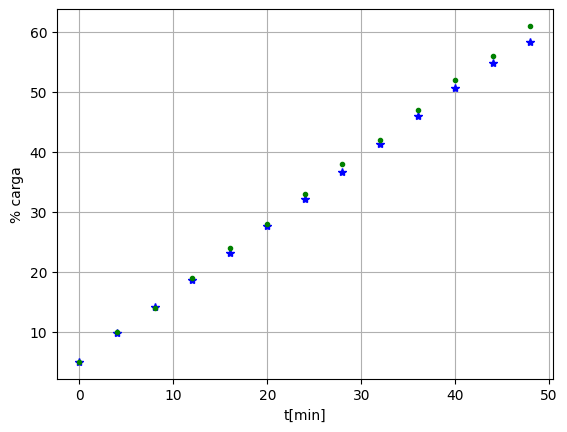

In [53]:
predict=prediccion(x,pesosT)
graficaReg(x,t,predict)

Regresion con keras

In [24]:
import pandas as pd
df=pd.read_csv('/home/matias/Documentos/IA2/u3/DatosBateria - CSV.csv')
print(df)
print(df.columns)

    minutos  bateria
0         0        5
1         4       10
2         8       14
3        12       19
4        16       24
5        20       28
6        24       33
7        28       38
8        32       42
9        36       47
10       40       52
11       44       56
12       48       61
Index(['minutos', 'bateria'], dtype='object')


In [25]:
x=df['minutos']
t=df['bateria']
x=np.array(x)
x=x[:,np.newaxis]
t=np.array(t)
t=t[:,np.newaxis]

In [55]:
import keras 
import keras.backend as kb
import tensorflow as tf


2023-02-24 10:43:00.784412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 10:43:00.976101: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-24 10:43:00.976131: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-24 10:43:01.759968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [56]:
model=keras.Sequential([
    keras.layers.Dense(100,activation=tf.nn.relu,input_shape=[1]),
    keras.layers.Dense(1)
])
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error','mean_squared_error'])

2023-02-24 10:43:05.294255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-24 10:43:05.294296: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-24 10:43:05.294328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (matias-IdeaPad-3-15ALC6): /proc/driver/nvidia/version does not exist
2023-02-24 10:43:05.294638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
model.fit(x,t,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 396ms/step - loss: 1824.9537 - mean_absolute_error: 37.5895 - mean_squared_error: 1824.9537
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 938.8657 - mean_absolute_error: 27.2636 - mean_squared_error: 938.8657
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 541.5101 - mean_absolute_error: 20.9498 - mean_squared_error: 541.5101
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 304.3192 - mean_absolute_error: 15.9410 - mean_squared_error: 304.3192
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 160.4102 - mean_absolute_error: 11.8096 - mean_squared_error: 160.4102
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 78.4816 - mean_absolute_error: 8.4800 - mean_squared_error: 78.4816
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 35.9871 - mean_absolute_error: 5.9106 - mean_squared_error: 35.9871
E

1/1 [==============================] - 0s 44ms/step


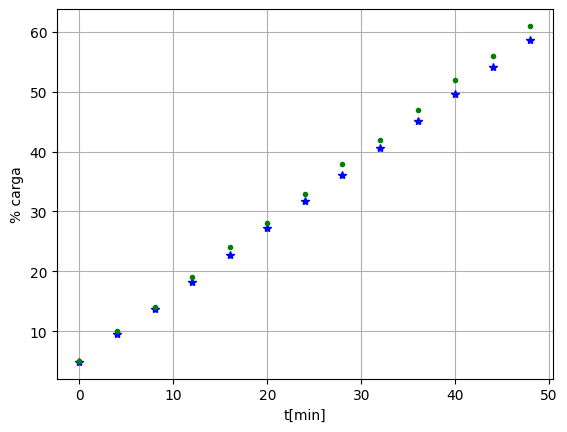

In [59]:
graficaReg(x,t,model.predict(x))